In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from collections import Counter
from google.colab import drive
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import StandardScaler
import tensorflow.keras as kr
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score, roc_auc_score, classification_report

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
ros = pd.read_csv('/content/drive/MyDrive/23 24/Spring 24/Thesis 2/Thesis/CSVs/df_ros.csv')
rus = pd.read_csv('/content/drive/MyDrive/23 24/Spring 24/Thesis 2/Thesis/CSVs/df_rus.csv')
smote = pd.read_csv('/content/drive/MyDrive/23 24/Spring 24/Thesis 2/Thesis/CSVs/df_smote.csv')
smoteen = pd.read_csv('/content/drive/MyDrive/23 24/Spring 24/Thesis 2/Thesis/CSVs/df_smoteen.csv')
smtk = pd.read_csv('/content/drive/MyDrive/23 24/Spring 24/Thesis 2/Thesis/CSVs/df_smotetomek.csv')
tkl = pd.read_csv('/content/drive/MyDrive/23 24/Spring 24/Thesis 2/Thesis/CSVs/df_tl.csv')
test= pd.read_csv('/content/drive/MyDrive/23 24/Spring 24/Thesis 2/Thesis/CSVs/test.csv')

# Logistic Regression

## Modelling

In [ ]:
metrics_dict = {}

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_auc_score, accuracy_score, roc_curve

### Random Oversampling

In [ ]:
# Select features and target
X_train = ros.drop('is_fraud', axis=1)
y_train = ros['is_fraud']

# Assume the test dataset is already split into features and target
X_test = test.drop('is_fraud', axis=1)
y_test = test['is_fraud']

In [ ]:
from sklearn.model_selection import cross_val_score, KFold

# Define K-fold cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize and fit logistic regression model
model = LogisticRegression()

# Compute metrics using cross-validation
recall_scores = cross_val_score(model, X_train, y_train, cv=kfold, scoring='recall')
precision_scores = cross_val_score(model, X_train, y_train, cv=kfold, scoring='precision')
f1_scores = cross_val_score(model, X_train, y_train, cv=kfold, scoring='f1')

# Calculate mean scores
mean_recall = round(recall_scores.mean(), 5)
mean_precision = round(precision_scores.mean(), 5)
mean_f1 = round(f1_scores.mean(), 5)

# Display mean scores
print(f"Mean Recall: {mean_recall}")
print(f"Mean Precision: {mean_precision}")
print(f"Mean F1 Score: {mean_f1}")

Mean Recall: 0.76859
Mean Precision: 0.87461
Mean F1 Score: 0.81818


In [ ]:
# Fit model on the entire training set
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate recall, precision, and F1-score on the test set
recall_test = round(recall_score(y_test, y_pred), 5)
precision_test = round(precision_score(y_test, y_pred), 5)
f1_test = round(f1_score(y_test, y_pred), 5)

# Display mean scores from cross-validation
print("Cross-validation results:")
print(f"Mean Recall: {mean_recall}")
print(f"Mean Precision: {mean_precision}")
print(f"Mean F1 Score: {mean_f1}")

# Display results on the test set
print("\nResults on the test set:")
print(f"Recall: {recall_test}")
print(f"Precision: {precision_test}")
print(f"F1 Score: {f1_test}")

Cross-validation results:
Mean Recall: 0.76859
Mean Precision: 0.87461
Mean F1 Score: 0.81818

Results on the test set:
Recall: 0.74825
Precision: 0.02553
F1 Score: 0.04937


In [ ]:
metrics_dict['Logistic Regression ROS (Cross-Validation)'] = {'Mean Recall': mean_recall, 'Mean Precision': mean_precision, 'Mean F1 Score': mean_f1}
metrics_dict['Logistic Regression ROS (Test Set)'] = {'Recall': recall_test, 'Precision': precision_test, 'F1 Score': f1_test}

In [ ]:
import pickle

# Save model
with open('/content/drive/MyDrive/23 24/Spring 24/Thesis 2/Thesis/Models/CV pickles/logros.pkl', 'wb') as file:
    pickle.dump(model, file)

### Random Undersampling

In [ ]:
# Select features and target
X_train = rus.drop('is_fraud', axis=1)
y_train = rus['is_fraud']


# Define K-fold cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize and fit logistic regression model
model = LogisticRegression()

# Compute metrics using cross-validation
recall_scores = cross_val_score(model, X_train, y_train, cv=kfold, scoring='recall')
precision_scores = cross_val_score(model, X_train, y_train, cv=kfold, scoring='precision')
f1_scores = cross_val_score(model, X_train, y_train, cv=kfold, scoring='f1')

# Calculate mean scores
mean_recall = round(recall_scores.mean(), 5)
mean_precision = round(precision_scores.mean(), 5)
mean_f1 = round(f1_scores.mean(), 5)

# Display mean scores
print(f"Mean Recall: {mean_recall}")
print(f"Mean Precision: {mean_precision}")
print(f"Mean F1 Score: {mean_f1}")

Mean Recall: 0.77056
Mean Precision: 0.86197
Mean F1 Score: 0.81341


In [ ]:
# Fit model on the entire training set
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate recall, precision, and F1-score on the test set
recall_test = round(recall_score(y_test, y_pred), 5)
precision_test = round(precision_score(y_test, y_pred), 5)
f1_test = round(f1_score(y_test, y_pred), 5)

# Display mean scores from cross-validation
print("Cross-validation results:")
print(f"Mean Recall: {mean_recall}")
print(f"Mean Precision: {mean_precision}")
print(f"Mean F1 Score: {mean_f1}")

# Display results on the test set
print("\nResults on the test set:")
print(f"Recall: {recall_test}")
print(f"Precision: {precision_test}")
print(f"F1 Score: {f1_test}")

Cross-validation results:
Mean Recall: 0.77056
Mean Precision: 0.86197
Mean F1 Score: 0.81341

Results on the test set:
Recall: 0.75524
Precision: 0.02428
F1 Score: 0.04705


In [ ]:
metrics_dict['Logistic Regression RUS (Cross-Validation)'] = {'Mean Recall': mean_recall, 'Mean Precision': mean_precision, 'Mean F1 Score': mean_f1}
metrics_dict['Logistic Regression RUS (Test Set)'] = {'Recall': recall_test, 'Precision': precision_test, 'F1 Score': f1_test}

In [ ]:
import pickle

# Save model
with open('/content/drive/MyDrive/23 24/Spring 24/Thesis 2/Thesis/Models/CV pickles/logrus.pkl', 'wb') as file:
    pickle.dump(model, file)

### SMOTE

In [ ]:
# Select features and target
X_train = smote.drop('is_fraud', axis=1)
y_train = smote['is_fraud']

In [ ]:
# Define K-fold cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize and fit logistic regression model
model = LogisticRegression()

# Compute metrics using cross-validation
recall_scores = cross_val_score(model, X_train, y_train, cv=kfold, scoring='recall')
precision_scores = cross_val_score(model, X_train, y_train, cv=kfold, scoring='precision')
f1_scores = cross_val_score(model, X_train, y_train, cv=kfold, scoring='f1')

# Calculate mean scores
mean_recall = round(recall_scores.mean(), 5)
mean_precision = round(precision_scores.mean(), 5)
mean_f1 = round(f1_scores.mean(), 5)

# Display mean scores
print(f"Mean Recall: {mean_recall}")
print(f"Mean Precision: {mean_precision}")
print(f"Mean F1 Score: {mean_f1}")

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Mean Recall: 0.96938
Mean Precision: 0.99434
Mean F1 Score: 0.9817


In [ ]:
# Fit model on the entire training set
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate recall, precision, and F1-score on the test set
recall_test = round(recall_score(y_test, y_pred), 5)
precision_test = round(precision_score(y_test, y_pred), 5)
f1_test = round(f1_score(y_test, y_pred), 5)

# Display mean scores from cross-validation
print("Cross-validation results:")
print(f"Mean Recall: {mean_recall}")
print(f"Mean Precision: {mean_precision}")
print(f"Mean F1 Score: {mean_f1}")

# Display results on the test set
print("\nResults on the test set:")
print(f"Recall: {recall_test}")
print(f"Precision: {precision_test}")
print(f"F1 Score: {f1_test}")

Cross-validation results:
Mean Recall: 0.96938
Mean Precision: 0.99434
Mean F1 Score: 0.9817

Results on the test set:
Recall: 0.67599
Precision: 0.31419
F1 Score: 0.42899


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
metrics_dict['Logistic Regression SMOTE (Cross-Validation)'] = {'Mean Recall': mean_recall, 'Mean Precision': mean_precision, 'Mean F1 Score': mean_f1}
metrics_dict['Logistic Regression SMOTE (Test Set)'] = {'Recall': recall_test, 'Precision': precision_test, 'F1 Score': f1_test}

In [ ]:
import pickle

# Save model
with open('/content/drive/MyDrive/23 24/Spring 24/Thesis 2/Thesis/Models/CV pickles/logsmote.pkl', 'wb') as file:
    pickle.dump(model, file)

### Smoteen

In [ ]:
# Select features and target
X_train = smoteen.drop('is_fraud', axis=1)
y_train = smoteen['is_fraud']

In [ ]:
# Define K-fold cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize and fit logistic regression model
model = LogisticRegression()

# Compute metrics using cross-validation
recall_scores = cross_val_score(model, X_train, y_train, cv=kfold, scoring='recall')
precision_scores = cross_val_score(model, X_train, y_train, cv=kfold, scoring='precision')
f1_scores = cross_val_score(model, X_train, y_train, cv=kfold, scoring='f1')

# Calculate mean scores
mean_recall = round(recall_scores.mean(), 5)
mean_precision = round(precision_scores.mean(), 5)
mean_f1 = round(f1_scores.mean(), 5)

# Display mean scores
print(f"Mean Recall: {mean_recall}")
print(f"Mean Precision: {mean_precision}")
print(f"Mean F1 Score: {mean_f1}")

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Mean Recall: 0.96938
Mean Precision: 0.99434
Mean F1 Score: 0.9817


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# Fit model on the entire training set
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate recall, precision, and F1-score on the test set
recall_test = round(recall_score(y_test, y_pred), 5)
precision_test = round(precision_score(y_test, y_pred), 5)
f1_test = round(f1_score(y_test, y_pred), 5)

# Display mean scores from cross-validation
print("Cross-validation results:")
print(f"Mean Recall: {mean_recall}")
print(f"Mean Precision: {mean_precision}")
print(f"Mean F1 Score: {mean_f1}")

# Display results on the test set
print("\nResults on the test set:")
print(f"Recall: {recall_test}")
print(f"Precision: {precision_test}")
print(f"F1 Score: {f1_test}")

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Cross-validation results:
Mean Recall: 0.96938
Mean Precision: 0.99434
Mean F1 Score: 0.9817

Results on the test set:
Recall: 0.67599
Precision: 0.31419
F1 Score: 0.42899


In [ ]:
metrics_dict['Logistic Regression Smoteen (Cross-Validation)'] = {'Mean Recall': mean_recall, 'Mean Precision': mean_precision, 'Mean F1 Score': mean_f1}
metrics_dict['Logistic Regression Smoteen (Test Set)'] = {'Recall': recall_test, 'Precision': precision_test, 'F1 Score': f1_test}

In [ ]:
import pickle

# Save model
with open('/content/drive/MyDrive/23 24/Spring 24/Thesis 2/Thesis/Models/CV pickles/logsmoteen.pkl', 'wb') as file:
    pickle.dump(model, file)

### SmoteTomek

In [ ]:
# Select features and target
X_train = smtk.drop('is_fraud', axis=1)
y_train = smtk['is_fraud']

In [ ]:
# Define K-fold cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize and fit logistic regression model
model = LogisticRegression()

# Compute metrics using cross-validation
recall_scores = cross_val_score(model, X_train, y_train, cv=kfold, scoring='recall')
precision_scores = cross_val_score(model, X_train, y_train, cv=kfold, scoring='precision')
f1_scores = cross_val_score(model, X_train, y_train, cv=kfold, scoring='f1')

# Calculate mean scores
mean_recall = round(recall_scores.mean(), 5)
mean_precision = round(precision_scores.mean(), 5)
mean_f1 = round(f1_scores.mean(), 5)

# Display mean scores
print(f"Mean Recall: {mean_recall}")
print(f"Mean Precision: {mean_precision}")
print(f"Mean F1 Score: {mean_f1}")

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Mean Recall: 0.96938
Mean Precision: 0.99434
Mean F1 Score: 0.9817


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# Fit model on the entire training set
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate recall, precision, and F1-score on the test set
recall_test = round(recall_score(y_test, y_pred), 5)
precision_test = round(precision_score(y_test, y_pred), 5)
f1_test = round(f1_score(y_test, y_pred), 5)

# Display mean scores from cross-validation
print("Cross-validation results:")
print(f"Mean Recall: {mean_recall}")
print(f"Mean Precision: {mean_precision}")
print(f"Mean F1 Score: {mean_f1}")

# Display results on the test set
print("\nResults on the test set:")
print(f"Recall: {recall_test}")
print(f"Precision: {precision_test}")
print(f"F1 Score: {f1_test}")

Cross-validation results:
Mean Recall: 0.96938
Mean Precision: 0.99434
Mean F1 Score: 0.9817

Results on the test set:
Recall: 0.67599
Precision: 0.31419
F1 Score: 0.42899


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
metrics_dict['Logistic Regression SmoteTomek (Cross-Validation)'] = {'Mean Recall': mean_recall, 'Mean Precision': mean_precision, 'Mean F1 Score': mean_f1}
metrics_dict['Logistic Regression SmoteTomek (Test Set)'] = {'Recall': recall_test, 'Precision': precision_test, 'F1 Score': f1_test}

In [ ]:
import pickle

# Save model
with open('/content/drive/MyDrive/23 24/Spring 24/Thesis 2/Thesis/Models/CV pickles/logsmtk.pkl', 'wb') as file:
    pickle.dump(model, file)

### TomekLinks

In [ ]:
# Select features and target
X_train = tkl.drop('is_fraud', axis=1)
y_train = tkl['is_fraud']

In [ ]:
# Define K-fold cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize and fit logistic regression model
model = LogisticRegression()

# Compute metrics using cross-validation
recall_scores = cross_val_score(model, X_train, y_train, cv=kfold, scoring='recall')
precision_scores = cross_val_score(model, X_train, y_train, cv=kfold, scoring='precision')
f1_scores = cross_val_score(model, X_train, y_train, cv=kfold, scoring='f1')

# Calculate mean scores
mean_recall = round(recall_scores.mean(), 5)
mean_precision = round(precision_scores.mean(), 5)
mean_f1 = round(f1_scores.mean(), 5)

# Display mean scores
print(f"Mean Recall: {mean_recall}")
print(f"Mean Precision: {mean_precision}")
print(f"Mean F1 Score: {mean_f1}")

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Mean Recall: 0.0
Mean Precision: 0.0
Mean F1 Score: 0.0


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# Fit model on the entire training set
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate recall, precision, and F1-score on the test set
recall_test = round(recall_score(y_test, y_pred), 5)
precision_test = round(precision_score(y_test, y_pred), 5)
f1_test = round(f1_score(y_test, y_pred), 5)

# Display mean scores from cross-validation
print("Cross-validation results:")
print(f"Mean Recall: {mean_recall}")
print(f"Mean Precision: {mean_precision}")
print(f"Mean F1 Score: {mean_f1}")

# Display results on the test set
print("\nResults on the test set:")
print(f"Recall: {recall_test}")
print(f"Precision: {precision_test}")
print(f"F1 Score: {f1_test}")

Cross-validation results:
Mean Recall: 0.0
Mean Precision: 0.0
Mean F1 Score: 0.0

Results on the test set:
Recall: 0.0
Precision: 0.0
F1 Score: 0.0


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
metrics_dict['Logistic Regression TomekLinks (Cross-Validation)'] = {'Mean Recall': mean_recall, 'Mean Precision': mean_precision, 'Mean F1 Score': mean_f1}
metrics_dict['Logistic Regression TomekLinks (Test Set)'] = {'Recall': recall_test, 'Precision': precision_test, 'F1 Score': f1_test}

In [ ]:
import pickle

# Save model
with open('/content/drive/MyDrive/23 24/Spring 24/Thesis 2/Thesis/Models/CV pickles/logtkl.pkl', 'wb') as file:
    pickle.dump(model, file)

## Comparative Analysis

In [ ]:
metrics_df = pd.DataFrame.from_dict(metrics_dict, orient='index')
metrics_df

,Mean Recall,Mean Precision,Mean F1 Score,Recall,Precision,F1 Score
Logistic Regression ROS (Cross-Validation),0.76859,0.87461,0.81818,NaN,NaN,NaN
Logistic Regression RUS (Cross-Validation),0.77056,0.86197,0.81341,NaN,NaN,NaN
Logistic Regression SMOTE (Cross-Validation),0.96938,0.99434,0.98170,NaN,NaN,NaN
Logistic Regression Smoteen (Cross-Validation),0.96938,0.99434,0.98170,NaN,NaN,NaN
Logistic Regression SmoteTomek (Cross-Validation),0.96938,0.99434,0.98170,NaN,NaN,NaN
Logistic Regression TomekLinks (Cross-Validation),0.00000,0.00000,0.00000,NaN,NaN,NaN
Logistic Regression ROS (Test Set),NaN,NaN,NaN,0.74825,0.02553,0.04937
Logistic Regression RUS (Test Set),NaN,NaN,NaN,0.75524,0.02428,0.04705
Logistic Regression SMOTE (Test Set),NaN,NaN,NaN,0.67599,0.31419,0.42899
Logistic Regression Smoteen (Test Set),NaN,NaN,NaN,0.67599,0.31419,0.42899


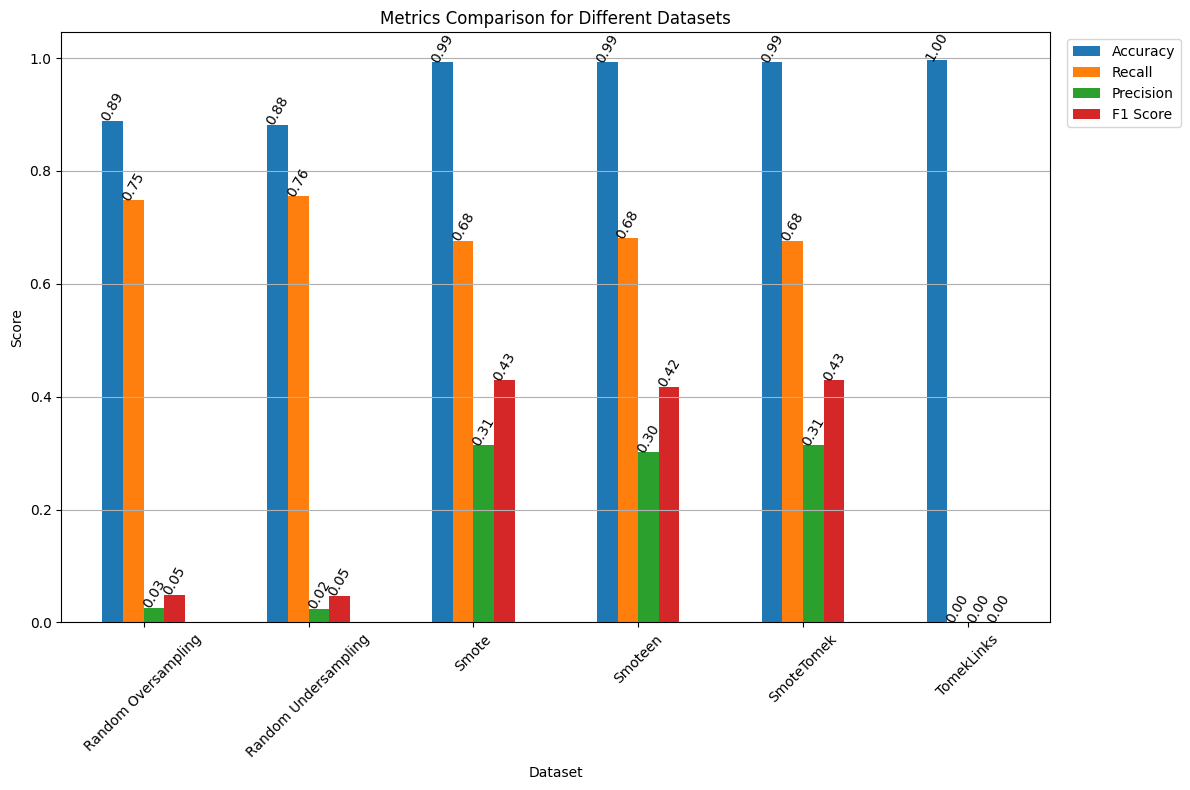

In [ ]:
# Plot metrics comparison
plt.figure(figsize=(12, 8))
ax = metrics_df.iloc[:,1:].plot(kind='bar', ax=plt.gca())
plt.title('Metrics Comparison for Different Datasets')
plt.xlabel('Dataset')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.01, 1), loc="upper left")

# Annotate bars with metric values
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',rotation=60, xytext=(0, 10), textcoords='offset points')

plt.grid(axis='y')
plt.tight_layout()
plt.show()

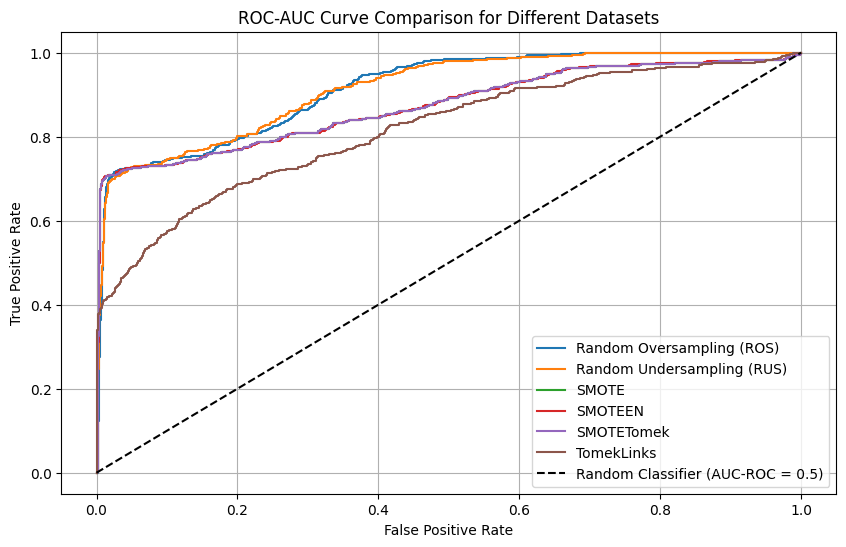

In [ ]:
# Plot ROC-AUC Curves
plt.figure(figsize=(10, 6))

# Plot ROC curves for each dataset
plt.plot(fpr_ros, tpr_ros, label='Random Oversampling (ROS)')
plt.plot(fpr_rus, tpr_rus, label='Random Undersampling (RUS)')
plt.plot(fpr_smote, tpr_smote, label='SMOTE')
plt.plot(fpr_smoteen, tpr_smoteen, label='SMOTEEN')
plt.plot(fpr_smtk, tpr_smtk, label='SMOTETomek')
plt.plot(fpr_tkl, tpr_tkl, label='TomekLinks')

# Plot random classifier line
plt.plot([0, 1], [0, 1], linestyle='--', color='black', label='Random Classifier (AUC-ROC = 0.5)')

# Set plot labels and legend
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC Curve Comparison for Different Datasets')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

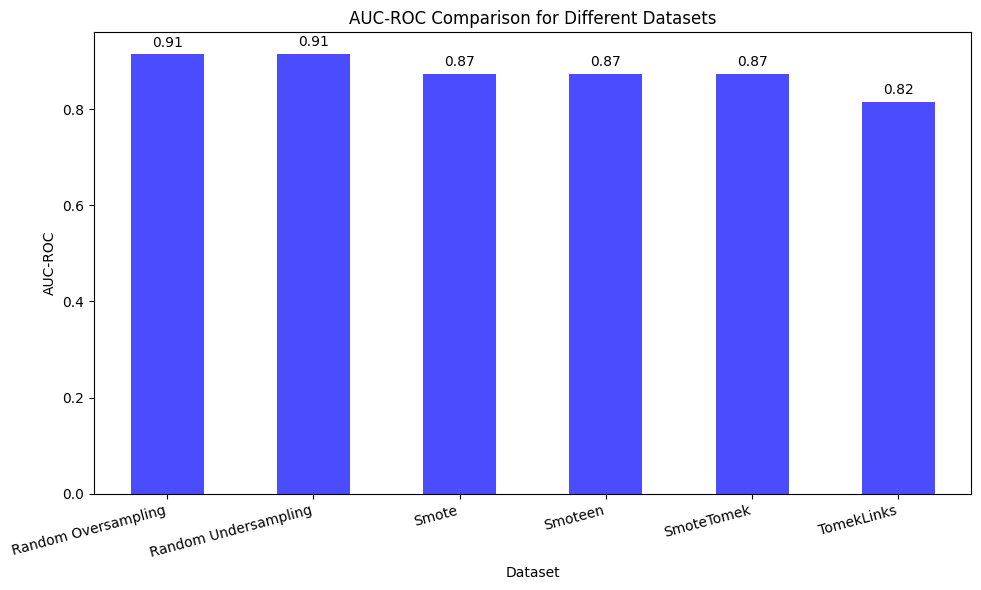

In [ ]:
# Plot AUC-ROC values
plt.figure(figsize=(10, 6))
metrics_df['AUC-ROC'].plot(kind='bar', color='blue', alpha=0.7)

# Add labels and title
plt.title('AUC-ROC Comparison for Different Datasets')
plt.xlabel('Dataset')
plt.ylabel('AUC-ROC')

# Add value labels on top of each bar
for i, auc_roc in enumerate(metrics_df['AUC-ROC']):
    plt.text(i, auc_roc + 0.01, f'{auc_roc:.2f}', ha='center', va='bottom')

# Show plot
plt.xticks(rotation=15, ha='right')
plt.tight_layout()
plt.show()


## De-Standardization

In [ ]:
with open('/content/drive/MyDrive/Thesis/CSVs/ogdata.pkl', 'rb') as file:
    scaler = pickle.load(file)

# Assuming 'X_standardized' is your standardized data
X = scaler.inverse_transform(ros.iloc[:,:14])
X

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/Thesis/CSVs/ogdata.pkl'

# UNDER SAMPLING TECHNIQUES

## 1. Random UnderSampling DF

In [ ]:
metrics_dict_ml = {}

#### a. Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score
from sklearn.metrics import roc_curve

In [ ]:
# Select features and target
X_train = rus.drop('is_fraud', axis=1)
y_train = rus['is_fraud']

In [ ]:
# Initialize the Random Forest classifier
rf_model = RandomForestClassifier()

# Train the classifier on the training data
rf_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = rf_model.predict(X_test)

In [ ]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import recall_score, precision_score, f1_score

# Define K-fold cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Compute metrics using cross-validation
recall_scores_cv = cross_val_score(rf_model, X_train, y_train, cv=kfold, scoring='recall')
precision_scores_cv = cross_val_score(rf_model, X_train, y_train, cv=kfold, scoring='precision')
f1_scores_cv = cross_val_score(rf_model, X_train, y_train, cv=kfold, scoring='f1')

# Calculate mean scores for cross-validation
mean_recall_cv = round(recall_scores_cv.mean(), 5)
mean_precision_cv = round(precision_scores_cv.mean(), 5)
mean_f1_cv = round(f1_scores_cv.mean(), 5)

# Add cross-validation metrics to dictionary
metrics_dict_ml['Random Forest RUS (Cross-Validation)'] = {'Mean Recall': mean_recall_cv, 'Mean Precision': mean_precision_cv, 'Mean F1 Score': mean_f1_cv}

# Calculate metrics on the test set
recall_test = round(recall_score(y_test, y_pred), 5)
precision_test = round(precision_score(y_test, y_pred), 5)
f1_test = round(f1_score(y_test, y_pred), 5)

# Add test set metrics to dictionary
metrics_dict_ml['Random Forest RUS (Test Set)'] = {'Recall': recall_test, 'Precision': precision_test, 'F1 Score': f1_test}

In [ ]:
# Display mean scores from cross-validation
print("Cross-validation results:")
print(f"Mean Recall: {mean_recall_cv}")
print(f"Mean Precision: {mean_precision_cv}")
print(f"Mean F1 Score: {mean_f1_cv}")

# Display results on the test set
print("\nResults on the test set:")
print(f"Recall: {recall_test}")
print(f"Precision: {precision_test}")
print(f"F1 Score: {f1_test}")

Cross-validation results:
Mean Recall: 0.94599
Mean Precision: 0.96492
Mean F1 Score: 0.95407

Results on the test set:
Recall: 0.9627
Precision: 0.10677
F1 Score: 0.19223


In [ ]:
import pickle

# Save model
with open('/content/drive/MyDrive/23 24/Spring 24/Thesis 2/Thesis/Models/CV pickles/rus_rf.pkl', 'wb') as file:
    pickle.dump(rf_model, file)

### b. Extreme Gradient Boost (XGBoost)


In [ ]:
from xgboost import XGBClassifier

In [ ]:
# Initialize and fit logistic regression model
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)

# Predict probabilities on test set
y_pred_proba = xgb_model.predict_proba(X_test)[:, 1]

# Predict on test set
y_pred = xgb_model.predict(X_test)

In [ ]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import recall_score, precision_score, f1_score

# Define K-fold cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Compute metrics using cross-validation
recall_scores_cv = cross_val_score(xgb_model, X_train, y_train, cv=kfold, scoring='recall')
precision_scores_cv = cross_val_score(xgb_model, X_train, y_train, cv=kfold, scoring='precision')
f1_scores_cv = cross_val_score(xgb_model, X_train, y_train, cv=kfold, scoring='f1')

# Calculate mean scores for cross-validation
mean_recall_cv = round(recall_scores_cv.mean(), 5)
mean_precision_cv = round(precision_scores_cv.mean(), 5)
mean_f1_cv = round(f1_scores_cv.mean(), 5)

# Add cross-validation metrics to dictionary
metrics_dict_ml['XGBoost RUS (Cross-Validation)'] = {'Mean Recall': mean_recall_cv, 'Mean Precision': mean_precision_cv, 'Mean F1 Score': mean_f1_cv}

# Calculate metrics on the test set
recall_test = round(recall_score(y_test, y_pred), 5)
precision_test = round(precision_score(y_test, y_pred), 5)
f1_test = round(f1_score(y_test, y_pred), 5)

# Add test set metrics to dictionary
metrics_dict_ml['XGBoost RUS (Test Set)'] = {'Recall': recall_test, 'Precision': precision_test, 'F1 Score': f1_test}


In [ ]:
# Display mean scores from cross-validation
print("Cross-validation results:")
print(f"Mean Recall: {mean_recall_cv}")
print(f"Mean Precision: {mean_precision_cv}")
print(f"Mean F1 Score: {mean_f1_cv}")

# Display results on the test set
print("\nResults on the test set:")
print(f"Recall: {recall_test}")
print(f"Precision: {precision_test}")
print(f"F1 Score: {f1_test}")

Cross-validation results:
Mean Recall: 0.96328
Mean Precision: 0.96541
Mean F1 Score: 0.96431

Results on the test set:
Recall: 0.98135
Precision: 0.10549
F1 Score: 0.1905


In [ ]:
import pickle

# Save model
with open('/content/drive/MyDrive/23 24/Spring 24/Thesis 2/Thesis/Models/CV pickles/rus_xgb.pkl', 'wb') as file:
    pickle.dump(xgb_model, file)

 ### c. LightGBM

In [ ]:
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

In [ ]:
# Initialize and fit logistic regression model
lgb_model =  LGBMClassifier(objective='binary', metric='auc', verbose=100)
lgb_model.fit(X_train, y_train)

# Predict probabilities on test set
y_pred_proba = lgb_model.predict_proba(X_test)[:, 1]

# Predict on test set
y_pred = lgb_model.predict(X_test)

[LightGBM] [Info] Number of positive: 1716, number of negative: 1716
[LightGBM] [Debug] Dataset::GetMultiBinFromAllFeatures: sparse rate 0.040846
[LightGBM] [Debug] init for col-wise cost 0.000371 seconds, init for row-wise cost 0.000693 seconds
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001141 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Debug] Using Dense Multi-Val Bin
[LightGBM] [Info] Total Bins 948
[LightGBM] [Info] Number of data points in the train set: 3432, number of used features: 41
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 8
[LightGBM] [Debug]

In [ ]:
# Define K-fold cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Compute metrics using cross-validation
recall_scores_cv = cross_val_score(lgb_model, X_train, y_train, cv=kfold, scoring='recall')
precision_scores_cv = cross_val_score(lgb_model, X_train, y_train, cv=kfold, scoring='precision')
f1_scores_cv = cross_val_score(lgb_model, X_train, y_train, cv=kfold, scoring='f1')

# Calculate mean scores for cross-validation
mean_recall_cv = round(recall_scores_cv.mean(), 5)
mean_precision_cv = round(precision_scores_cv.mean(), 5)
mean_f1_cv = round(f1_scores_cv.mean(), 5)

# Add cross-validation metrics to dictionary
metrics_dict_ml['LightGBM RUS (Cross-Validation)'] = {'Mean Recall': mean_recall_cv, 'Mean Precision': mean_precision_cv, 'Mean F1 Score': mean_f1_cv}

# Calculate metrics on the test set
recall_test = round(recall_score(y_test, y_pred), 5)
precision_test = round(precision_score(y_test, y_pred), 5)
f1_test = round(f1_score(y_test, y_pred), 5)

# Add test set metrics to dictionary
metrics_dict_ml['LightGBM RUS (Test Set)'] = {'Recall': recall_test, 'Precision': precision_test, 'F1 Score': f1_test}


[LightGBM] [Info] Number of positive: 1388, number of negative: 1357
[LightGBM] [Debug] Dataset::GetMultiBinFromAllFeatures: sparse rate 0.040868
[LightGBM] [Debug] init for col-wise cost 0.000008 seconds, init for row-wise cost 0.001504 seconds
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000203 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Debug] Using Dense Multi-Val Bin
[LightGBM] [Info] Total Bins 948
[LightGBM] [Info] Number of data points in the train set: 2745, number of used features: 41
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.505647 -> initscore=0.022587
[LightGBM] [Info] Start training from score 0.022587
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 8
[LightGBM] [Debug] Trained a tr

In [ ]:
# Display mean scores from cross-validation
print("Cross-validation results:")
print(f"Mean Recall: {mean_recall_cv}")
print(f"Mean Precision: {mean_precision_cv}")
print(f"Mean F1 Score: {mean_f1_cv}")

# Display results on the test set
print("\nResults on the test set:")
print(f"Recall: {recall_test}")
print(f"Precision: {precision_test}")
print(f"F1 Score: {f1_test}")

Cross-validation results:
Mean Recall: 0.96548
Mean Precision: 0.96945
Mean F1 Score: 0.96745

Results on the test set:
Recall: 0.97669
Precision: 0.11269
F1 Score: 0.20207


In [ ]:
import pickle

# Save model
with open('/content/drive/MyDrive/23 24/Spring 24/Thesis 2/Thesis/Models/CV pickles/rus_lgbm.pkl', 'wb') as file:
    pickle.dump(lgb_model, file)

## 2. Tomeklinks

In [ ]:
tkl.head()

,amt,gender,city_pop,Month,Hour,age,job_Agriculture,job_Business,job_Creative,job_Education,...,region_West,distance,weekday_Friday,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,is_fraud
0,-0.326279,0,-0.290814,-0.257069,-0.118789,1.810280,0,0,0,0,...,0,1.307092,0,1,0,0,0,0,0,0
1,0.785585,1,-0.223335,0.753949,-0.265612,-0.597602,0,0,0,0,...,0,1.162314,0,0,0,0,0,0,1,0
2,-0.162638,0,-0.290618,-0.257069,-0.265612,0.549009,0,1,0,0,...,1,1.256416,0,0,0,0,0,1,0,0
3,-0.434735,0,-0.289709,-0.257069,-1.146551,0.892992,0,0,0,1,...,0,0.833528,0,0,0,0,0,1,0,0
4,-0.378975,0,-0.292369,1.259458,0.468503,2.440915,0,0,0,0,...,0,-0.966156,0,0,0,0,0,0,1,0


#### a. Random Forest

In [ ]:
# Select features and target
X_train = tkl.drop('is_fraud', axis=1)
y_train = tkl['is_fraud']

In [ ]:
# Initialize the Random Forest classifier
rf_model = RandomForestClassifier()

# Train the classifier on the training data
rf_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = rf_model.predict(X_test)

In [ ]:
# Define K-fold cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Compute metrics using cross-validation
recall_scores_cv = cross_val_score(rf_model, X_train, y_train, cv=kfold, scoring='recall')
precision_scores_cv = cross_val_score(rf_model, X_train, y_train, cv=kfold, scoring='precision')
f1_scores_cv = cross_val_score(rf_model, X_train, y_train, cv=kfold, scoring='f1')

# Calculate mean scores for cross-validation
mean_recall_cv = round(recall_scores_cv.mean(), 5)
mean_precision_cv = round(precision_scores_cv.mean(), 5)
mean_f1_cv = round(f1_scores_cv.mean(), 5)

# Add cross-validation metrics to dictionary
metrics_dict_ml['Random Forest TomekLinks (Cross-Validation)'] = {'Mean Recall': mean_recall_cv, 'Mean Precision': mean_precision_cv, 'Mean F1 Score': mean_f1_cv}

# Calculate metrics on the test set
recall_test = round(recall_score(y_test, y_pred), 5)
precision_test = round(precision_score(y_test, y_pred), 5)
f1_test = round(f1_score(y_test, y_pred), 5)

# Add test set metrics to dictionary
metrics_dict_ml['Random Forest TomekLinks (Test Set)'] = {'Recall': recall_test, 'Precision': precision_test, 'F1 Score': f1_test}


In [ ]:
# Display mean scores from cross-validation
print("Cross-validation results:")
print(f"Mean Recall: {mean_recall_cv}")
print(f"Mean Precision: {mean_precision_cv}")
print(f"Mean F1 Score: {mean_f1_cv}")

# Display results on the test set
print("\nResults on the test set:")
print(f"Recall: {recall_test}")
print(f"Precision: {precision_test}")
print(f"F1 Score: {f1_test}")

Cross-validation results:
Mean Recall: 0.94183
Mean Precision: 0.96384
Mean F1 Score: 0.95659

Results on the test set:
Recall: 0.9627
Precision: 0.11241
F1 Score: 0.20132


In [ ]:
import pickle

# Save model
with open('/content/drive/MyDrive/23 24/Spring 24/Thesis 2/Thesis/Models/CV pickles/tkl_rf.pkl', 'wb') as file:
    pickle.dump(rf_model, file)

### b. Extreme Gradient Boost (XGBoost)


In [ ]:
from xgboost import XGBClassifier

In [ ]:
# Initialize and fit logistic regression model
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)

# Predict probabilities on test set
y_pred_proba = xgb_model.predict_proba(X_test)[:, 1]

# Predict on test set
y_pred = xgb_model.predict(X_test)

In [ ]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import recall_score, precision_score, f1_score

# Define K-fold cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Compute metrics using cross-validation
recall_scores_cv = cross_val_score(xgb_model, X_train, y_train, cv=kfold, scoring='recall')
precision_scores_cv = cross_val_score(xgb_model, X_train, y_train, cv=kfold, scoring='precision')
f1_scores_cv = cross_val_score(xgb_model, X_train, y_train, cv=kfold, scoring='f1')

# Calculate mean scores for cross-validation
mean_recall_cv = round(recall_scores_cv.mean(), 5)
mean_precision_cv = round(precision_scores_cv.mean(), 5)
mean_f1_cv = round(f1_scores_cv.mean(), 5)

# Add cross-validation metrics to dictionary
metrics_dict_ml['XGBoost TomekLinks (Cross-Validation)'] = {'Mean Recall': mean_recall_cv, 'Mean Precision': mean_precision_cv, 'Mean F1 Score': mean_f1_cv}

# Calculate metrics on the test set
recall_test = round(recall_score(y_test, y_pred), 5)
precision_test = round(precision_score(y_test, y_pred), 5)
f1_test = round(f1_score(y_test, y_pred), 5)

# Add test set metrics to dictionary
metrics_dict_ml['XGBoost TomekLinks (Test Set)'] = {'Recall': recall_test, 'Precision': precision_test, 'F1 Score': f1_test}


In [ ]:
# Display mean scores from cross-validation
print("Cross-validation results:")
print(f"Mean Recall: {mean_recall_cv}")
print(f"Mean Precision: {mean_precision_cv}")
print(f"Mean F1 Score: {mean_f1_cv}")

# Display results on the test set
print("\nResults on the test set:")
print(f"Recall: {recall_test}")
print(f"Precision: {precision_test}")
print(f"F1 Score: {f1_test}")

Cross-validation results:
Mean Recall: 0.96328
Mean Precision: 0.96541
Mean F1 Score: 0.96431

Results on the test set:
Recall: 0.98135
Precision: 0.10549
F1 Score: 0.1905


In [ ]:
import pickle

# Save model
with open('/content/drive/MyDrive/23 24/Spring 24/Thesis 2/Thesis/Models/CV pickles/tkl_xgb.pkl', 'wb') as file:
    pickle.dump(xgb_model, file)

 ### c. LightGBM

In [ ]:
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

In [ ]:
# Initialize and fit logistic regression model
lgb_model =  LGBMClassifier(objective='binary', metric='auc', verbose=100)
lgb_model.fit(X_train, y_train)

# Predict probabilities on test set
y_pred_proba = lgb_model.predict_proba(X_test)[:, 1]

# Predict on test set
y_pred = lgb_model.predict(X_test)

[LightGBM] [Info] Number of positive: 1716, number of negative: 1716
[LightGBM] [Debug] Dataset::GetMultiBinFromAllFeatures: sparse rate 0.040846
[LightGBM] [Debug] init for col-wise cost 0.000017 seconds, init for row-wise cost 0.001126 seconds
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000263 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Debug] Using Dense Multi-Val Bin
[LightGBM] [Info] Total Bins 948
[LightGBM] [Info] Number of data points in the train set: 3432, number of used features: 41
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 8
[LightGBM] [Debug]

In [ ]:
# Define K-fold cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Compute metrics using cross-validation
recall_scores_cv = cross_val_score(lgb_model, X_train, y_train, cv=kfold, scoring='recall')
precision_scores_cv = cross_val_score(lgb_model, X_train, y_train, cv=kfold, scoring='precision')
f1_scores_cv = cross_val_score(lgb_model, X_train, y_train, cv=kfold, scoring='f1')

# Calculate mean scores for cross-validation
mean_recall_cv = round(recall_scores_cv.mean(), 5)
mean_precision_cv = round(precision_scores_cv.mean(), 5)
mean_f1_cv = round(f1_scores_cv.mean(), 5)

# Add cross-validation metrics to dictionary
metrics_dict_ml['LightGBM TomekLinks (Cross-Validation)'] = {'Mean Recall': mean_recall_cv, 'Mean Precision': mean_precision_cv, 'Mean F1 Score': mean_f1_cv}

# Calculate metrics on the test set
recall_test = round(recall_score(y_test, y_pred), 5)
precision_test = round(precision_score(y_test, y_pred), 5)
f1_test = round(f1_score(y_test, y_pred), 5)

# Add test set metrics to dictionary
metrics_dict_ml['LightGBM TomekLinks (Test Set)'] = {'Recall': recall_test, 'Precision': precision_test, 'F1 Score': f1_test}


[LightGBM] [Info] Number of positive: 1388, number of negative: 1357
[LightGBM] [Debug] Dataset::GetMultiBinFromAllFeatures: sparse rate 0.040868
[LightGBM] [Debug] init for col-wise cost 0.000009 seconds, init for row-wise cost 0.000930 seconds
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000215 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Debug] Using Dense Multi-Val Bin
[LightGBM] [Info] Total Bins 948
[LightGBM] [Info] Number of data points in the train set: 2745, number of used features: 41
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.505647 -> initscore=0.022587
[LightGBM] [Info] Start training from score 0.022587
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 8
[LightGBM] [Debug] Trained a tr

In [ ]:
# Display mean scores from cross-validation
print("Cross-validation results:")
print(f"Mean Recall: {mean_recall_cv}")
print(f"Mean Precision: {mean_precision_cv}")
print(f"Mean F1 Score: {mean_f1_cv}")

# Display results on the test set
print("\nResults on the test set:")
print(f"Recall: {recall_test}")
print(f"Precision: {precision_test}")
print(f"F1 Score: {f1_test}")

Cross-validation results:
Mean Recall: 0.96548
Mean Precision: 0.96945
Mean F1 Score: 0.96745

Results on the test set:
Recall: 0.97669
Precision: 0.11269
F1 Score: 0.20207


In [ ]:
import pickle

# Save model
with open('/content/drive/MyDrive/23 24/Spring 24/Thesis 2/Thesis/Models/CV pickles/tomek_lgbm.pkl', 'wb') as file:
    pickle.dump(lgb_model, file)

# OVER SAMPLING TECHNIQUES

## 1. Random OverSampling DF

In [ ]:
ros.head()

,amt,gender,city_pop,Month,Hour,age,job_Agriculture,job_Business,job_Creative,job_Education,...,region_West,distance,weekday_Friday,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,is_fraud
0,-0.326279,0,-0.290814,-0.257069,-0.118789,1.810280,0,0,0,0,...,0,1.307092,0,1,0,0,0,0,0,0
1,0.785585,1,-0.223335,0.753949,-0.265612,-0.597602,0,0,0,0,...,0,1.162314,0,0,0,0,0,0,1,0
2,-0.162638,0,-0.290618,-0.257069,-0.265612,0.549009,0,1,0,0,...,1,1.256416,0,0,0,0,0,1,0,0
3,-0.434735,0,-0.289709,-0.257069,-1.146551,0.892992,0,0,0,1,...,0,0.833528,0,0,0,0,0,1,0,0
4,-0.378975,0,-0.292369,1.259458,0.468503,2.440915,0,0,0,0,...,0,-0.966156,0,0,0,0,0,0,1,0


In [ ]:
# Select features and target
X_train = ros.drop('is_fraud', axis=1)
y_train = ros['is_fraud']

#### a. Random Forest

In [ ]:
# Initialize the Random Forest classifier
rf_model = RandomForestClassifier()

# Train the classifier on the training data
rf_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = rf_model.predict(X_test)

from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import recall_score, precision_score, f1_score

# Define K-fold cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Compute metrics using cross-validation
recall_scores_cv = cross_val_score(rf_model, X_train, y_train, cv=kfold, scoring='recall')
precision_scores_cv = cross_val_score(rf_model, X_train, y_train, cv=kfold, scoring='precision')
f1_scores_cv = cross_val_score(rf_model, X_train, y_train, cv=kfold, scoring='f1')

# Calculate mean scores for cross-validation
mean_recall_cv = round(recall_scores_cv.mean(), 5)
mean_precision_cv = round(precision_scores_cv.mean(), 5)
mean_f1_cv = round(f1_scores_cv.mean(), 5)

# Add cross-validation metrics to dictionary
metrics_dict_ml['Random Forest ROS (Cross-Validation)'] = {'Mean Recall': mean_recall_cv, 'Mean Precision': mean_precision_cv, 'Mean F1 Score': mean_f1_cv}

# Calculate metrics on the test set
recall_test = round(recall_score(y_test, y_pred), 5)
precision_test = round(precision_score(y_test, y_pred), 5)
f1_test = round(f1_score(y_test, y_pred), 5)

# Add test set metrics to dictionary
metrics_dict_ml['Random Forest ROS (Test Set)'] = {'Recall': recall_test, 'Precision': precision_test, 'F1 Score': f1_test}

In [ ]:
# Display mean scores from cross-validation
print("Random Forest - Cross-validation results:")
print(f"Mean Recall: {mean_recall_cv}")
print(f"Mean Precision: {mean_precision_cv}")
print(f"Mean F1 Score: {mean_f1_cv}")

# Display results on the test set
print("\nRandom Forest - Results on the test set:")
print(f"Recall: {recall_test}")
print(f"Precision: {precision_test}")
print(f"F1 Score: {f1_test}")

Random Forest - Cross-validation results:
Mean Recall: 1.0
Mean Precision: 0.99988
Mean F1 Score: 0.99995

Random Forest - Results on the test set:
Recall: 0.69697
Precision: 0.96764
F1 Score: 0.8103


In [ ]:
import pickle

# Save model
with open('/content/drive/MyDrive/23 24/Spring 24/Thesis 2/Thesis/Models/CV pickles/ros_rf.pkl', 'wb') as file:
    pickle.dump(rf_model, file)

### b. Extreme Gradient Boost (XGBoost)


In [ ]:
from xgboost import XGBClassifier

In [ ]:
# Initialize and fit logistic regression model
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)

# Predict probabilities on test set
y_pred_proba = xgb_model.predict_proba(X_test)[:, 1]

# Predict on test set
y_pred = xgb_model.predict(X_test)

In [ ]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import recall_score, precision_score, f1_score

# Define K-fold cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Compute metrics using cross-validation
recall_scores_cv = cross_val_score(xgb_model, X_train, y_train, cv=kfold, scoring='recall')
precision_scores_cv = cross_val_score(xgb_model, X_train, y_train, cv=kfold, scoring='precision')
f1_scores_cv = cross_val_score(xgb_model, X_train, y_train, cv=kfold, scoring='f1')

# Calculate mean scores for cross-validation
mean_recall_cv = round(recall_scores_cv.mean(), 5)
mean_precision_cv = round(precision_scores_cv.mean(), 5)
mean_f1_cv = round(f1_scores_cv.mean(), 5)

# Add cross-validation metrics to dictionary
metrics_dict_ml['XGBoost ROS (Cross-Validation)'] = {'Mean Recall': mean_recall_cv, 'Mean Precision': mean_precision_cv, 'Mean F1 Score': mean_f1_cv}

# Calculate metrics on the test set
recall_test = round(recall_score(y_test, y_pred), 5)
precision_test = round(precision_score(y_test, y_pred), 5)
f1_test = round(f1_score(y_test, y_pred), 5)

# Add test set metrics to dictionary
metrics_dict_ml['XGBoost ROS (Test Set)'] = {'Recall': recall_test, 'Precision': precision_test, 'F1 Score': f1_test}

# Display mean scores from cross-validation
print("XGBoost - Cross-validation results:")
print(f"Mean Recall: {mean_recall_cv}")
print(f"Mean Precision: {mean_precision_cv}")
print(f"Mean F1 Score: {mean_f1_cv}")

# Display results on the test set
print("\nXGBoost - Results on the test set:")
print(f"Recall: {recall_test}")
print(f"Precision: {precision_test}")
print(f"F1 Score: {f1_test}")

XGBoost - Cross-validation results:
Mean Recall: 1.0
Mean Precision: 0.99778
Mean F1 Score: 0.99889

XGBoost - Results on the test set:
Recall: 0.92308
Precision: 0.62857
F1 Score: 0.74788


In [ ]:
import pickle

# Save model
with open('/content/drive/MyDrive/23 24/Spring 24/Thesis 2/Thesis/Models/CV pickles/ros_xgb.pkl', 'wb') as file:
    pickle.dump(xgb_model, file)

 ### c. LightGBM

In [ ]:
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

In [ ]:
# Initialize and fit logistic regression model
lgb_model =  LGBMClassifier(objective='binary', metric='auc', verbose=100)
lgb_model.fit(X_train, y_train)

# Predict probabilities on test set
y_pred_proba = lgb_model.predict_proba(X_test)[:, 1]

# Predict on test set
y_pred = lgb_model.predict(X_test)

[LightGBM] [Info] Number of positive: 442859, number of negative: 442859
[LightGBM] [Debug] Dataset::GetMultiBinFromAllFeatures: sparse rate 0.041288
[LightGBM] [Debug] init for col-wise cost 0.000018 seconds, init for row-wise cost 0.120952 seconds
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.060909 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Debug] Using Dense Multi-Val Bin
[LightGBM] [Info] Total Bins 950
[LightGBM] [Info] Number of data points in the train set: 885718, number of used features: 41
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 9
[LightGBM] [D

In [ ]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import recall_score, precision_score, f1_score

# Define K-fold cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Compute metrics using cross-validation
recall_scores_cv = cross_val_score(lgb_model, X_train, y_train, cv=kfold, scoring='recall')
precision_scores_cv = cross_val_score(lgb_model, X_train, y_train, cv=kfold, scoring='precision')
f1_scores_cv = cross_val_score(lgb_model, X_train, y_train, cv=kfold, scoring='f1')

# Calculate mean scores for cross-validation
mean_recall_cv = round(recall_scores_cv.mean(), 5)
mean_precision_cv = round(precision_scores_cv.mean(), 5)
mean_f1_cv = round(f1_scores_cv.mean(), 5)

# Add cross-validation metrics to dictionary
metrics_dict_ml['LightGBM ROS (Cross-Validation)'] = {'Mean Recall': mean_recall_cv, 'Mean Precision': mean_precision_cv, 'Mean F1 Score': mean_f1_cv}

# Calculate metrics on the test set
recall_test = round(recall_score(y_test, y_pred), 5)
precision_test = round(precision_score(y_test, y_pred), 5)
f1_test = round(f1_score(y_test, y_pred), 5)

# Add test set metrics to dictionary
metrics_dict_ml['LightGBM ROS (Test Set)'] = {'Recall': recall_test, 'Precision': precision_test, 'F1 Score': f1_test}

# Display mean scores from cross-validation
print("LightGBM - Cross-validation results:")
print(f"Mean Recall: {mean_recall_cv}")
print(f"Mean Precision: {mean_precision_cv}")
print(f"Mean F1 Score: {mean_f1_cv}")

# Display results on the test set
print("\nLightGBM - Results on the test set:")
print(f"Recall: {recall_test}")
print(f"Precision: {precision_test}")
print(f"F1 Score: {f1_test}")

[LightGBM] [Info] Number of positive: 354329, number of negative: 354245
[LightGBM] [Debug] Dataset::GetMultiBinFromAllFeatures: sparse rate 0.041125
[LightGBM] [Debug] init for col-wise cost 0.000010 seconds, init for row-wise cost 0.058811 seconds
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.026423 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Debug] Using Dense Multi-Val Bin
[LightGBM] [Info] Total Bins 950
[LightGBM] [Info] Number of data points in the train set: 708574, number of used features: 41
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500059 -> initscore=0.000237
[LightGBM] [Info] Start training from score 0.000237
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 8
[LightGBM] [Debug] Traine

In [ ]:
import pickle

# Save model
with open('/content/drive/MyDrive/23 24/Spring 24/Thesis 2/Thesis/Models/CV pickles/ros_lgbm.pkl', 'wb') as file:
    pickle.dump(lgb_model, file)

## 2. SMOTE

In [ ]:
smote.head()

,amt,gender,city_pop,Month,Hour,age,job_Agriculture,job_Business,job_Creative,job_Education,...,region_West,distance,weekday_Friday,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,is_fraud
0,-0.326279,0,-0.290814,-0.257069,-0.118789,1.810280,0,0,0,0,...,0,1.307092,0,1,0,0,0,0,0,0
1,0.785585,1,-0.223335,0.753949,-0.265612,-0.597602,0,0,0,0,...,0,1.162314,0,0,0,0,0,0,1,0
2,-0.162638,0,-0.290618,-0.257069,-0.265612,0.549009,0,1,0,0,...,1,1.256416,0,0,0,0,0,1,0,0
3,-0.434735,0,-0.289709,-0.257069,-1.146551,0.892992,0,0,0,1,...,0,0.833528,0,0,0,0,0,1,0,0
4,-0.378975,0,-0.292369,1.259458,0.468503,2.440915,0,0,0,0,...,0,-0.966156,0,0,0,0,0,0,1,0


#### a. Random Forest

In [ ]:
# Select features and target
X_train = smote.drop('is_fraud', axis=1)
y_train = smote['is_fraud']

In [ ]:
# Initialize the Random Forest classifier
rf_model = RandomForestClassifier()

# Train the classifier on the training data
rf_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = rf_model.predict(X_test)

In [ ]:
# Make predictions on the testing data
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import recall_score, precision_score, f1_score

# Define K-fold cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Compute metrics using cross-validation
recall_scores_cv = cross_val_score(rf_model, X_train, y_train, cv=kfold, scoring='recall')
precision_scores_cv = cross_val_score(rf_model, X_train, y_train, cv=kfold, scoring='precision')
f1_scores_cv = cross_val_score(rf_model, X_train, y_train, cv=kfold, scoring='f1')

# Calculate mean scores for cross-validation
mean_recall_cv = round(recall_scores_cv.mean(), 5)
mean_precision_cv = round(precision_scores_cv.mean(), 5)
mean_f1_cv = round(f1_scores_cv.mean(), 5)

# Add cross-validation metrics to dictionary
metrics_dict_ml['Random Forest SMOTE (Cross-Validation)'] = {'Mean Recall': mean_recall_cv, 'Mean Precision': mean_precision_cv, 'Mean F1 Score': mean_f1_cv}

# Calculate metrics on the test set
recall_test = round(recall_score(y_test, y_pred), 5)
precision_test = round(precision_score(y_test, y_pred), 5)
f1_test = round(f1_score(y_test, y_pred), 5)

# Add test set metrics to dictionary
metrics_dict_ml['Random Forest SMOTE (Test Set)'] = {'Recall': recall_test, 'Precision': precision_test, 'F1 Score': f1_test}

In [ ]:
# Display mean scores from cross-validation
print("Random Forest - Cross-validation results:")
print(f"Mean Recall: {mean_recall_cv}")
print(f"Mean Precision: {mean_precision_cv}")
print(f"Mean F1 Score: {mean_f1_cv}")

# Display results on the test set
print("\nRandom Forest - Results on the test set:")
print(f"Recall: {recall_test}")
print(f"Precision: {precision_test}")
print(f"F1 Score: {f1_test}")

Random Forest - Cross-validation results:
Mean Recall: 0.99964
Mean Precision: 0.99974
Mean F1 Score: 0.99967

Random Forest - Results on the test set:
Recall: 0.70862
Precision: 0.91843
F1 Score: 0.8


In [ ]:
import pickle

# Save model
with open('/content/drive/MyDrive/23 24/Spring 24/Thesis 2/Thesis/Models/CV pickles/smote_rf.pkl', 'wb') as file:
    pickle.dump(rf_model, file)

### b. Extreme Gradient Boost (XGBoost)


In [ ]:
from xgboost import XGBClassifier

In [ ]:
# Select features and target
X_train = smote.drop('is_fraud', axis=1)
y_train = smote['is_fraud']

# Initialize and fit logistic regression model
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)

# Predict probabilities on test set
y_pred_proba = xgb_model.predict_proba(X_test)[:, 1]

# Predict on test set
y_pred = xgb_model.predict(X_test)

In [ ]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import recall_score, precision_score, f1_score

# Define K-fold cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Compute metrics using cross-validation
recall_scores_cv = cross_val_score(xgb_model, X_train, y_train, cv=kfold, scoring='recall')
precision_scores_cv = cross_val_score(xgb_model, X_train, y_train, cv=kfold, scoring='precision')
f1_scores_cv = cross_val_score(xgb_model, X_train, y_train, cv=kfold, scoring='f1')

# Calculate mean scores for cross-validation
mean_recall_cv = round(recall_scores_cv.mean(), 5)
mean_precision_cv = round(precision_scores_cv.mean(), 5)
mean_f1_cv = round(f1_scores_cv.mean(), 5)

# Add cross-validation metrics to dictionary
metrics_dict_ml['XGBoost SMOTE (Cross-Validation)'] = {'Mean Recall': mean_recall_cv, 'Mean Precision': mean_precision_cv, 'Mean F1 Score': mean_f1_cv}

# Calculate metrics on the test set
recall_test = round(recall_score(y_test, y_pred), 5)
precision_test = round(precision_score(y_test, y_pred), 5)
f1_test = round(f1_score(y_test, y_pred), 5)

# Add test set metrics to dictionary
metrics_dict_ml['XGBoost SMOTE (Test Set)'] = {'Recall': recall_test, 'Precision': precision_test, 'F1 Score': f1_test}

# Display mean scores from cross-validation
print("XGBoost - Cross-validation results:")
print(f"Mean Recall: {mean_recall_cv}")
print(f"Mean Precision: {mean_precision_cv}")
print(f"Mean F1 Score: {mean_f1_cv}")

# Display results on the test set
print("\nXGBoost - Results on the test set:")
print(f"Recall: {recall_test}")
print(f"Precision: {precision_test}")
print(f"F1 Score: {f1_test}")

XGBoost - Cross-validation results:
Mean Recall: 0.99972
Mean Precision: 0.99898
Mean F1 Score: 0.99935

XGBoost - Results on the test set:
Recall: 0.86247
Precision: 0.7582
F1 Score: 0.80698


In [ ]:
import pickle

# Save model
with open('/content/drive/MyDrive/23 24/Spring 24/Thesis 2/Thesis/Models/CV pickles/smote_xgb.pkl', 'wb') as file:
    pickle.dump(xgb_model, file)

 ### c. LightGBM

In [ ]:
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

In [ ]:
# Select features and target
X_train = smote.drop('is_fraud', axis=1)
y_train = smote['is_fraud']


# Initialize and fit logistic regression model
lgb_model =  LGBMClassifier(objective='binary', metric='auc', verbose=100)
lgb_model.fit(X_train, y_train)

# Predict probabilities on test set
y_pred_proba = lgb_model.predict_proba(X_test)[:, 1]

# Predict on test set
y_pred = lgb_model.predict(X_test)

[LightGBM] [Info] Number of positive: 442859, number of negative: 442859
[LightGBM] [Debug] Dataset::GetMultiBinFromAllFeatures: sparse rate 0.099561
[LightGBM] [Debug] init for col-wise cost 0.000012 seconds, init for row-wise cost 0.084485 seconds
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.035362 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Debug] Using Dense Multi-Val Bin
[LightGBM] [Info] Total Bins 1600
[LightGBM] [Info] Number of data points in the train set: 885718, number of used features: 41
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 11
[LightGB

In [ ]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import recall_score, precision_score, f1_score

# Define K-fold cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Compute metrics using cross-validation
recall_scores_cv = cross_val_score(lgb_model, X_train, y_train, cv=kfold, scoring='recall')
precision_scores_cv = cross_val_score(lgb_model, X_train, y_train, cv=kfold, scoring='precision')
f1_scores_cv = cross_val_score(lgb_model, X_train, y_train, cv=kfold, scoring='f1')

# Calculate mean scores for cross-validation
mean_recall_cv = round(recall_scores_cv.mean(), 5)
mean_precision_cv = round(precision_scores_cv.mean(), 5)
mean_f1_cv = round(f1_scores_cv.mean(), 5)

# Add cross-validation metrics to dictionary
metrics_dict_ml['LightGBM SMOTE (Cross-Validation)'] = {'Mean Recall': mean_recall_cv, 'Mean Precision': mean_precision_cv, 'Mean F1 Score': mean_f1_cv}

# Calculate metrics on the test set
recall_test = round(recall_score(y_test, y_pred), 5)
precision_test = round(precision_score(y_test, y_pred), 5)
f1_test = round(f1_score(y_test, y_pred), 5)

# Add test set metrics to dictionary
metrics_dict_ml['LightGBM SMOTE (Test Set)'] = {'Recall': recall_test, 'Precision': precision_test, 'F1 Score': f1_test}

# Display mean scores from cross-validation
print("LightGBM - Cross-validation results:")
print(f"Mean Recall: {mean_recall_cv}")
print(f"Mean Precision: {mean_precision_cv}")
print(f"Mean F1 Score: {mean_f1_cv}")

# Display results on the test set
print("\nLightGBM - Results on the test set:")
print(f"Recall: {recall_test}")
print(f"Precision: {precision_test}")
print(f"F1 Score: {f1_test}")

[LightGBM] [Info] Number of positive: 354329, number of negative: 354245
[LightGBM] [Debug] Dataset::GetMultiBinFromAllFeatures: sparse rate 0.099710
[LightGBM] [Debug] init for col-wise cost 0.000011 seconds, init for row-wise cost 0.068010 seconds
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.026889 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Debug] Using Dense Multi-Val Bin
[LightGBM] [Info] Total Bins 1600
[LightGBM] [Info] Number of data points in the train set: 708574, number of used features: 41
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500059 -> initscore=0.000237
[LightGBM] [Info] Start training from score 0.000237
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 12
[LightGBM] [Debug] Tra

In [ ]:
import pickle

# Save model
with open('/content/drive/MyDrive/23 24/Spring 24/Thesis 2/Thesis/Models/CV pickles/smote_lgbm.pkl', 'wb') as file:
    pickle.dump(lgb_model, file)

# Oversampling followed by Undersampling

## 1. Smote + Tomek (SmoteTomek)

In [ ]:
smtk.head()

,amt,gender,city_pop,Month,Hour,age,job_Agriculture,job_Business,job_Creative,job_Education,...,region_West,distance,weekday_Friday,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,is_fraud
0,-0.326279,0,-0.290814,-0.257069,-0.118789,1.810280,0,0,0,0,...,0,1.307092,0,1,0,0,0,0,0,0
1,0.785585,1,-0.223335,0.753949,-0.265612,-0.597602,0,0,0,0,...,0,1.162314,0,0,0,0,0,0,1,0
2,-0.162638,0,-0.290618,-0.257069,-0.265612,0.549009,0,1,0,0,...,1,1.256416,0,0,0,0,0,1,0,0
3,-0.434735,0,-0.289709,-0.257069,-1.146551,0.892992,0,0,0,1,...,0,0.833528,0,0,0,0,0,1,0,0
4,-0.378975,0,-0.292369,1.259458,0.468503,2.440915,0,0,0,0,...,0,-0.966156,0,0,0,0,0,0,1,0


#### a. Random Forest

In [ ]:
# Select features and target
X_train = smtk.drop('is_fraud', axis=1)
y_train = smtk['is_fraud']

In [ ]:
# Initialize the Random Forest classifier
rf_model = RandomForestClassifier()

# Train the classifier on the training data
rf_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = rf_model.predict(X_test)

In [ ]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import recall_score, precision_score, f1_score

# Define K-fold cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Compute metrics using cross-validation
recall_scores_cv = cross_val_score(rf_model, X_train, y_train, cv=kfold, scoring='recall')
precision_scores_cv = cross_val_score(rf_model, X_train, y_train, cv=kfold, scoring='precision')
f1_scores_cv = cross_val_score(rf_model, X_train, y_train, cv=kfold, scoring='f1')

# Calculate mean scores for cross-validation
mean_recall_cv = round(recall_scores_cv.mean(), 5)
mean_precision_cv = round(precision_scores_cv.mean(), 5)
mean_f1_cv = round(f1_scores_cv.mean(), 5)

# Add cross-validation metrics to dictionary
metrics_dict_ml['Random Forest SmoteTomek (Cross-Validation)'] = {'Mean Recall': mean_recall_cv,
                                                                  'Mean Precision': mean_precision_cv,
                                                                  'Mean F1 Score': mean_f1_cv}

# Calculate metrics on the test set
recall_test = round(recall_score(y_test, y_pred), 5)
precision_test = round(precision_score(y_test, y_pred), 5)
f1_test = round(f1_score(y_test, y_pred), 5)

# Add test set metrics to dictionary
metrics_dict_ml['Random Forest SmoteTomek (Test Set)'] = {'Recall': recall_test,
                                                          'Precision': precision_test,
                                                          'F1 Score': f1_test}

In [ ]:
# Display mean scores from cross-validation
print("Random Forest - Cross-validation results:")
print(f"Mean Recall: {mean_recall_cv}")
print(f"Mean Precision: {mean_precision_cv}")
print(f"Mean F1 Score: {mean_f1_cv}")

# Display results on the test set
print("\nRandom Forest - Results on the test set:")
print(f"Recall: {recall_test}")
print(f"Precision: {precision_test}")
print(f"F1 Score: {f1_test}")

Random Forest - Cross-validation results:
Mean Recall: 0.99962
Mean Precision: 0.99972
Mean F1 Score: 0.99968

Random Forest - Results on the test set:
Recall: 0.70629
Precision: 0.93519
F1 Score: 0.80478


In [ ]:
import pickle

# Save model
with open('/content/drive/MyDrive/23 24/Spring 24/Thesis 2/Thesis/Models/CV pickles/smtk_rf.pkl', 'wb') as file:
    pickle.dump(rf_model, file)

### b. Extreme Gradient Boost (XGBoost)


In [ ]:
from xgboost import XGBClassifier

In [ ]:
# Select features and target
X_train = smtk.drop('is_fraud', axis=1)
y_train = smtk['is_fraud']

# Assume the test dataset is already split into features and target
X_test = test.drop('is_fraud', axis=1)
y_test = test['is_fraud']

# Initialize and fit logistic regression model
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)

# Predict probabilities on test set
y_pred_proba = xgb_model.predict_proba(X_test)[:, 1]

# Predict on test set
y_pred = xgb_model.predict(X_test)

In [ ]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import recall_score, precision_score, f1_score

# Define K-fold cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Compute metrics using cross-validation
recall_scores_cv = cross_val_score(xgb_model, X_train, y_train, cv=kfold, scoring='recall')
precision_scores_cv = cross_val_score(xgb_model, X_train, y_train, cv=kfold, scoring='precision')
f1_scores_cv = cross_val_score(xgb_model, X_train, y_train, cv=kfold, scoring='f1')

# Calculate mean scores for cross-validation
mean_recall_cv = round(recall_scores_cv.mean(), 5)
mean_precision_cv = round(precision_scores_cv.mean(), 5)
mean_f1_cv = round(f1_scores_cv.mean(), 5)

# Add cross-validation metrics to dictionary
metrics_dict_ml['XGBoost SmoteTomek (Cross-Validation)'] = {'Mean Recall': mean_recall_cv, 'Mean Precision': mean_precision_cv, 'Mean F1 Score': mean_f1_cv}

# Calculate metrics on the test set
recall_test = round(recall_score(y_test, y_pred), 5)
precision_test = round(precision_score(y_test, y_pred), 5)
f1_test = round(f1_score(y_test, y_pred), 5)

# Add test set metrics to dictionary
metrics_dict_ml['XGBoost SmoteTomek (Test Set)'] = {'Recall': recall_test, 'Precision': precision_test, 'F1 Score': f1_test}

# Display mean scores from cross-validation
print("XGBoost - Cross-validation results:")
print(f"Mean Recall: {mean_recall_cv}")
print(f"Mean Precision: {mean_precision_cv}")
print(f"Mean F1 Score: {mean_f1_cv}")

# Display results on the test set
print("\nXGBoost - Results on the test set:")
print(f"Recall: {recall_test}")
print(f"Precision: {precision_test}")
print(f"F1 Score: {f1_test}")

XGBoost - Cross-validation results:
Mean Recall: 0.99972
Mean Precision: 0.99898
Mean F1 Score: 0.99935

XGBoost - Results on the test set:
Recall: 0.86247
Precision: 0.7582
F1 Score: 0.80698


In [ ]:
import pickle

# Save model
with open('/content/drive/MyDrive/23 24/Spring 24/Thesis 2/Thesis/Models/CV pickles/smtk_xgb.pkl', 'wb') as file:
    pickle.dump(xgb_model, file)

 ### c. LightGBM

In [ ]:
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

In [ ]:
# Select features and target
X_train = smtk.drop('is_fraud', axis=1)
y_train = smtk['is_fraud']

# Assume the test dataset is already split into features and target
X_test = test.drop('is_fraud', axis=1)
y_test = test['is_fraud']

# Initialize and fit logistic regression model
lgb_model =  LGBMClassifier(objective='binary', metric='auc', verbose=100)
lgb_model.fit(X_train, y_train)

# Predict probabilities on test set
y_pred_proba = lgb_model.predict_proba(X_test)[:, 1]

# Predict on test set
y_pred = lgb_model.predict(X_test)

[LightGBM] [Info] Number of positive: 442859, number of negative: 442859
[LightGBM] [Debug] Dataset::GetMultiBinFromAllFeatures: sparse rate 0.099561
[LightGBM] [Debug] init for col-wise cost 0.000015 seconds, init for row-wise cost 0.088722 seconds
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.036745 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Debug] Using Dense Multi-Val Bin
[LightGBM] [Info] Total Bins 1600
[LightGBM] [Info] Number of data points in the train set: 885718, number of used features: 41
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 11
[LightGB

In [ ]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import recall_score, precision_score, f1_score

# Define K-fold cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Compute metrics using cross-validation
recall_scores_cv = cross_val_score(lgb_model, X_train, y_train, cv=kfold, scoring='recall')
precision_scores_cv = cross_val_score(lgb_model, X_train, y_train, cv=kfold, scoring='precision')
f1_scores_cv = cross_val_score(lgb_model, X_train, y_train, cv=kfold, scoring='f1')

# Calculate mean scores for cross-validation
mean_recall_cv = round(recall_scores_cv.mean(), 5)
mean_precision_cv = round(precision_scores_cv.mean(), 5)
mean_f1_cv = round(f1_scores_cv.mean(), 5)

# Add cross-validation metrics to dictionary
metrics_dict_ml['LightGBM SmoteTomek (Cross-Validation)'] = {'Mean Recall': mean_recall_cv, 'Mean Precision': mean_precision_cv, 'Mean F1 Score': mean_f1_cv}

# Calculate metrics on the test set
recall_test = round(recall_score(y_test, y_pred), 5)
precision_test = round(precision_score(y_test, y_pred), 5)
f1_test = round(f1_score(y_test, y_pred), 5)

# Add test set metrics to dictionary
metrics_dict_ml['LightGBM SmoteTomek (Test Set)'] = {'Recall': recall_test, 'Precision': precision_test, 'F1 Score': f1_test}

# Display mean scores from cross-validation
print("LightGBM - Cross-validation results:")
print(f"Mean Recall: {mean_recall_cv}")
print(f"Mean Precision: {mean_precision_cv}")
print(f"Mean F1 Score: {mean_f1_cv}")

# Display results on the test set
print("\nLightGBM - Results on the test set:")
print(f"Recall: {recall_test}")
print(f"Precision: {precision_test}")
print(f"F1 Score: {f1_test}")

[LightGBM] [Info] Number of positive: 354329, number of negative: 354245
[LightGBM] [Debug] Dataset::GetMultiBinFromAllFeatures: sparse rate 0.099710
[LightGBM] [Debug] init for col-wise cost 0.000016 seconds, init for row-wise cost 0.080093 seconds
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.026232 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Debug] Using Dense Multi-Val Bin
[LightGBM] [Info] Total Bins 1600
[LightGBM] [Info] Number of data points in the train set: 708574, number of used features: 41
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500059 -> initscore=0.000237
[LightGBM] [Info] Start training from score 0.000237
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 12
[LightGBM] [Debug] Tra

In [ ]:
import pickle

# Save model
with open('/content/drive/MyDrive/23 24/Spring 24/Thesis 2/Thesis/Models/CV pickles/smtk_lgbm.pkl', 'wb') as file:
    pickle.dump(lgb_model, file)

## 2. Smote + ENN (Smoteen)

In [ ]:
smoteen.head()

,amt,gender,city_pop,Month,Hour,age,job_Agriculture,job_Business,job_Creative,job_Education,...,region_West,distance,weekday_Friday,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,is_fraud
0,-0.326279,0,-0.290814,-0.257069,-0.118789,1.810280,0,0,0,0,...,0,1.307092,0,1,0,0,0,0,0,0
1,0.785585,1,-0.223335,0.753949,-0.265612,-0.597602,0,0,0,0,...,0,1.162314,0,0,0,0,0,0,1,0
2,-0.162638,0,-0.290618,-0.257069,-0.265612,0.549009,0,1,0,0,...,1,1.256416,0,0,0,0,0,1,0,0
3,-0.434735,0,-0.289709,-0.257069,-1.146551,0.892992,0,0,0,1,...,0,0.833528,0,0,0,0,0,1,0,0
4,-0.378975,0,-0.292369,1.259458,0.468503,2.440915,0,0,0,0,...,0,-0.966156,0,0,0,0,0,0,1,0


#### a. Random Forest

In [ ]:
# Select features and target
X_train = smoteen.drop('is_fraud', axis=1)
y_train = smoteen['is_fraud']

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score
from sklearn.metrics import roc_curve
# Initialize the Random Forest classifier
rf_model = RandomForestClassifier()

# Train the classifier on the training data
rf_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = rf_model.predict(X_test)

In [ ]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import recall_score, precision_score, f1_score

# Define K-fold cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Compute metrics using cross-validation
recall_scores_cv = cross_val_score(rf_model, X_train, y_train, cv=kfold, scoring='recall')
precision_scores_cv = cross_val_score(rf_model, X_train, y_train, cv=kfold, scoring='precision')
f1_scores_cv = cross_val_score(rf_model, X_train, y_train, cv=kfold, scoring='f1')

# Calculate mean scores for cross-validation
mean_recall_cv = round(recall_scores_cv.mean(), 5)
mean_precision_cv = round(precision_scores_cv.mean(), 5)
mean_f1_cv = round(f1_scores_cv.mean(), 5)

# Add cross-validation metrics to dictionary
metrics_dict_ml['Random Forest Smoteen (Cross-Validation)'] = {'Mean Recall': mean_recall_cv, 'Mean Precision': mean_precision_cv, 'Mean F1 Score': mean_f1_cv}

# Calculate metrics on the test set
recall_test = round(recall_score(y_test, y_pred), 5)
precision_test = round(precision_score(y_test, y_pred), 5)
f1_test = round(f1_score(y_test, y_pred), 5)

# Add test set metrics to dictionary
metrics_dict_ml['Random Forest Smoteen (Test Set)'] = {'Recall': recall_test, 'Precision': precision_test, 'F1 Score': f1_test}

In [ ]:
# Display mean scores from cross-validation
print("Random Forest - Cross-validation results:")
print(f"Mean Recall: {mean_recall_cv}")
print(f"Mean Precision: {mean_precision_cv}")
print(f"Mean F1 Score: {mean_f1_cv}")

# Display results on the test set
print("\nRandom Forest - Results on the test set:")
print(f"Recall: {recall_test}")
print(f"Precision: {precision_test}")
print(f"F1 Score: {f1_test}")

Random Forest - Cross-validation results:
Mean Recall: 0.99963
Mean Precision: 0.99986
Mean F1 Score: 0.99976

Random Forest - Results on the test set:
Recall: 0.71562
Precision: 0.86969
F1 Score: 0.78517


In [ ]:
import pickle

# Save model
with open('/content/drive/MyDrive/23 24/Spring 24/Thesis 2/Thesis/Models/CV pickles/smoteen_rf.pkl', 'wb') as file:
    pickle.dump(rf_model, file)

### b. Extreme Gradient Boost (XGBoost)


In [ ]:
from xgboost import XGBClassifier

In [ ]:
# Select features and target
X_train = smoteen.drop('is_fraud', axis=1)
y_train = smoteen['is_fraud']

# Initialize and fit logistic regression model
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)

# Predict probabilities on test set
y_pred_proba = xgb_model.predict_proba(X_test)[:, 1]

# Predict on test set
y_pred = xgb_model.predict(X_test)

In [ ]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import recall_score, precision_score, f1_score

# Define K-fold cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Compute metrics using cross-validation
recall_scores_cv = cross_val_score(xgb_model, X_train, y_train, cv=kfold, scoring='recall')
precision_scores_cv = cross_val_score(xgb_model, X_train, y_train, cv=kfold, scoring='precision')
f1_scores_cv = cross_val_score(xgb_model, X_train, y_train, cv=kfold, scoring='f1')

# Calculate mean scores for cross-validation
mean_recall_cv = round(recall_scores_cv.mean(), 5)
mean_precision_cv = round(precision_scores_cv.mean(), 5)
mean_f1_cv = round(f1_scores_cv.mean(), 5)

# Add cross-validation metrics to dictionary
metrics_dict_ml['XGBoost Smoteen (Cross-Validation)'] = {'Mean Recall': mean_recall_cv, 'Mean Precision': mean_precision_cv, 'Mean F1 Score': mean_f1_cv}

# Calculate metrics on the test set
recall_test = round(recall_score(y_test, y_pred), 5)
precision_test = round(precision_score(y_test, y_pred), 5)
f1_test = round(f1_score(y_test, y_pred), 5)

# Add test set metrics to dictionary
metrics_dict_ml['XGBoost Smoteen (Test Set)'] = {'Recall': recall_test, 'Precision': precision_test, 'F1 Score': f1_test}

# Display mean scores from cross-validation
print("XGBoost - Cross-validation results:")
print(f"Mean Recall: {mean_recall_cv}")
print(f"Mean Precision: {mean_precision_cv}")
print(f"Mean F1 Score: {mean_f1_cv}")

# Display results on the test set
print("\nXGBoost - Results on the test set:")
print(f"Recall: {recall_test}")
print(f"Precision: {precision_test}")
print(f"F1 Score: {f1_test}")

XGBoost - Cross-validation results:
Mean Recall: 0.99974
Mean Precision: 0.9992
Mean F1 Score: 0.99947

XGBoost - Results on the test set:
Recall: 0.86713
Precision: 0.69533
F1 Score: 0.77178


In [ ]:
import pickle

# Save model
with open('/content/drive/MyDrive/23 24/Spring 24/Thesis 2/Thesis/Models/CV pickles/smoteen_xgb.pkl', 'wb') as file:
    pickle.dump(xgb_model, file)

 ### c. LightGBM

In [ ]:
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

In [ ]:
# Select features and target
X_train = smoteen.drop('is_fraud', axis=1)
y_train = smoteen['is_fraud']

# Assume the test dataset is already split into features and target
X_test = test.drop('is_fraud', axis=1)
y_test = test['is_fraud']

# Initialize and fit logistic regression model
lgb_model =  LGBMClassifier(objective='binary', metric='auc', verbose=100)
lgb_model.fit(X_train, y_train)

# Predict probabilities on test set
y_pred_proba = lgb_model.predict_proba(X_test)[:, 1]

# Predict on test set
y_pred = lgb_model.predict(X_test)

[LightGBM] [Info] Number of positive: 442859, number of negative: 439881
[LightGBM] [Debug] Dataset::GetMultiBinFromAllFeatures: sparse rate 0.099897
[LightGBM] [Debug] init for col-wise cost 0.000133 seconds, init for row-wise cost 0.071732 seconds
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.027734 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Debug] Using Dense Multi-Val Bin
[LightGBM] [Info] Total Bins 1598
[LightGBM] [Info] Number of data points in the train set: 882740, number of used features: 41
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.501687 -> initscore=0.006747
[LightGBM] [Info] Start training from score 0.006747
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 10
[LightGBM] [Debug] Tr

In [ ]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import recall_score, precision_score, f1_score

# Define K-fold cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Compute metrics using cross-validation
recall_scores_cv = cross_val_score(lgb_model, X_train, y_train, cv=kfold, scoring='recall')
precision_scores_cv = cross_val_score(lgb_model, X_train, y_train, cv=kfold, scoring='precision')
f1_scores_cv = cross_val_score(lgb_model, X_train, y_train, cv=kfold, scoring='f1')

# Calculate mean scores for cross-validation
mean_recall_cv = round(recall_scores_cv.mean(), 5)
mean_precision_cv = round(precision_scores_cv.mean(), 5)
mean_f1_cv = round(f1_scores_cv.mean(), 5)

# Add cross-validation metrics to dictionary
metrics_dict_ml['LightGBM Smoteen (Cross-Validation)'] = {'Mean Recall': mean_recall_cv, 'Mean Precision': mean_precision_cv, 'Mean F1 Score': mean_f1_cv}

# Calculate metrics on the test set
recall_test = round(recall_score(y_test, y_pred), 5)
precision_test = round(precision_score(y_test, y_pred), 5)
f1_test = round(f1_score(y_test, y_pred), 5)

# Add test set metrics to dictionary
metrics_dict_ml['LightGBM Smoteen (Test Set)'] = {'Recall': recall_test, 'Precision': precision_test, 'F1 Score': f1_test}

# Display mean scores from cross-validation
print("LightGBM - Cross-validation results:")
print(f"Mean Recall: {mean_recall_cv}")
print(f"Mean Precision: {mean_precision_cv}")
print(f"Mean F1 Score: {mean_f1_cv}")

# Display results on the test set
print("\nLightGBM - Results on the test set:")
print(f"Recall: {recall_test}")
print(f"Precision: {precision_test}")
print(f"F1 Score: {f1_test}")

[LightGBM] [Info] Number of positive: 354226, number of negative: 351966
[LightGBM] [Debug] Dataset::GetMultiBinFromAllFeatures: sparse rate 0.099707
[LightGBM] [Debug] init for col-wise cost 0.000008 seconds, init for row-wise cost 0.057662 seconds
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.021833 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Debug] Using Dense Multi-Val Bin
[LightGBM] [Info] Total Bins 1599
[LightGBM] [Info] Number of data points in the train set: 706192, number of used features: 41
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.501600 -> initscore=0.006401
[LightGBM] [Info] Start training from score 0.006401
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 10
[LightGBM] [Debug] Tr

In [ ]:
import pickle

# Save model
with open('/content/drive/MyDrive/23 24/Spring 24/Thesis 2/Thesis/Models/CV pickles/smoteen_lgbm.pkl', 'wb') as file:
    pickle.dump(lgb_model, file)

# Comparitive Analysis Between All Sampling Techniques

In [ ]:
metrics_df_ml = pd.DataFrame.from_dict(metrics_dict_ml, orient='index')
metrics_df_ml

In [ ]:
# Save the DataFrame to a CSV file
metrics_df_ml.to_csv('/content/drive/MyDrive/Thesis/CSVs/metrics_df_ml.csv', index=True)


### UNDERSAMPLING GRAPH

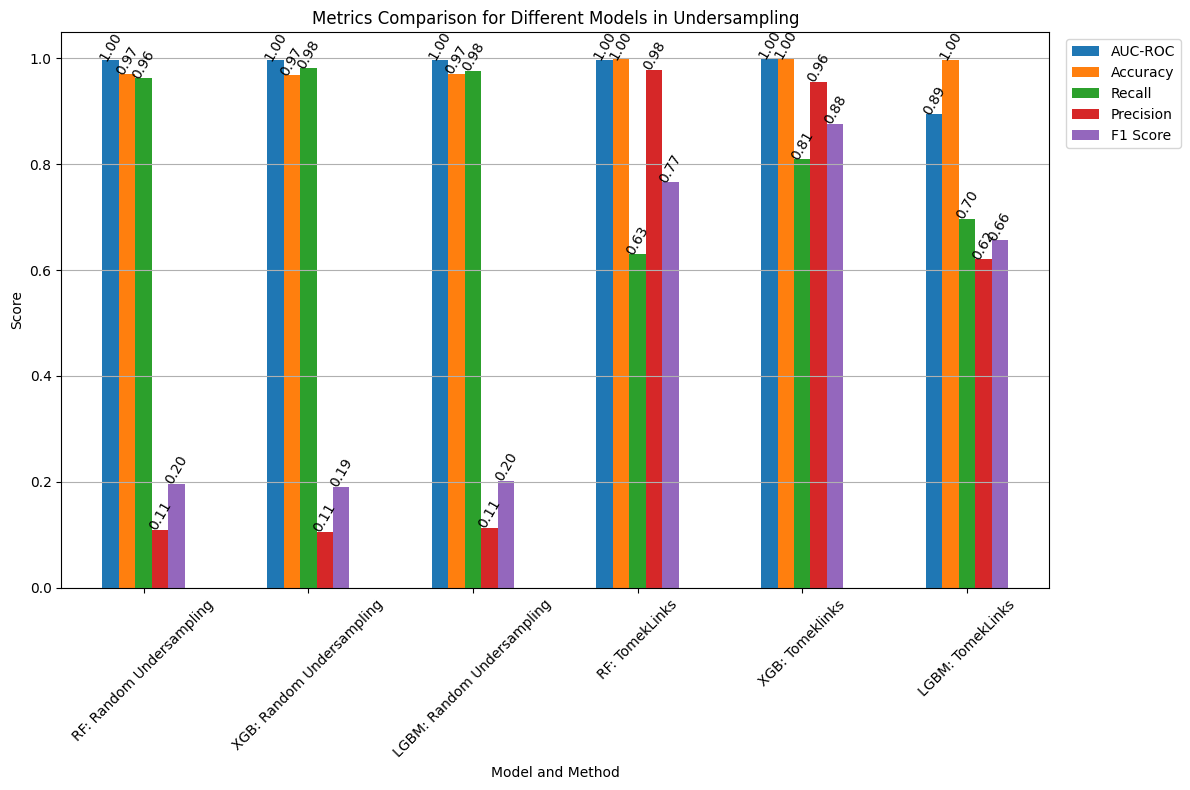

In [ ]:
# Plot metrics comparison
undersampling_methods = [
    'RF: Random Undersampling', 'XGB: Random Undersampling', 'LGBM: Random Undersampling',
    'RF: TomekLinks', 'XGB: Tomeklinks', 'LGBM: TomekLinks'
]

filtered_metrics_df_undersampling = metrics_df_ml.loc[undersampling_methods]

# Plot metrics comparison for undersampling methods
plt.figure(figsize=(12, 8))
ax = filtered_metrics_df_undersampling.iloc[:, :].plot(kind='bar', ax=plt.gca())
plt.title('Metrics Comparison for Different Models in Undersampling')
plt.xlabel('Model and Method')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.01, 1), loc="upper left")

# Annotate bars with metric values
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', rotation=60, xytext=(0, 10), textcoords='offset points')

plt.grid(axis='y')
plt.tight_layout()
plt.show()

### OverSampling Graph

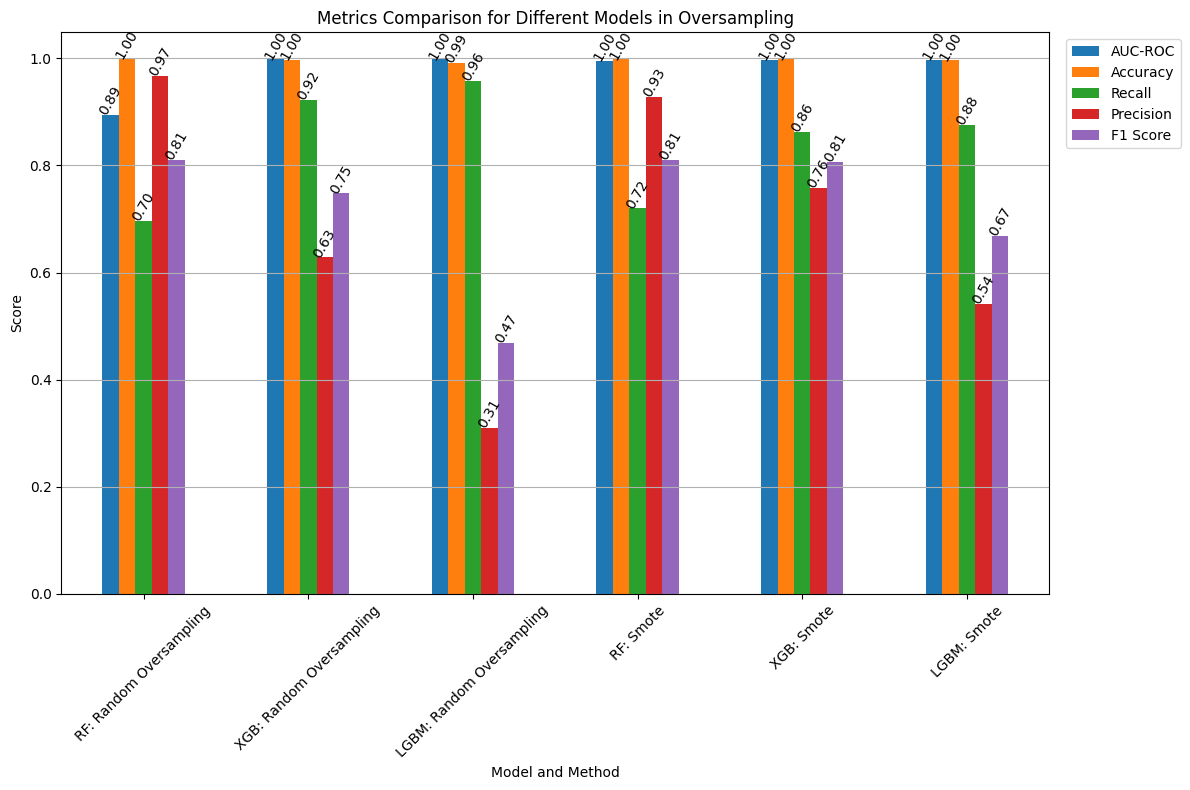

In [ ]:
# Plot metrics comparison
oversampling_methods = [
    'RF: Random Oversampling', 'XGB: Random Oversampling', 'LGBM: Random Oversampling',
    'RF: Smote', 'XGB: Smote', 'LGBM: Smote'
]

filtered_metrics_df_oversampling = metrics_df_ml.loc[oversampling_methods]

# Plot metrics comparison for oversampling methods
plt.figure(figsize=(12, 8))
ax = filtered_metrics_df_oversampling.iloc[:, :].plot(kind='bar', ax=plt.gca())
plt.title('Metrics Comparison for Different Models in Oversampling')
plt.xlabel('Model and Method')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.01, 1), loc="upper left")

# Annotate bars with metric values
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', rotation=60, xytext=(0, 10), textcoords='offset points')

plt.grid(axis='y')
plt.tight_layout()
plt.show()

### Oversampling followed by undersampling graph

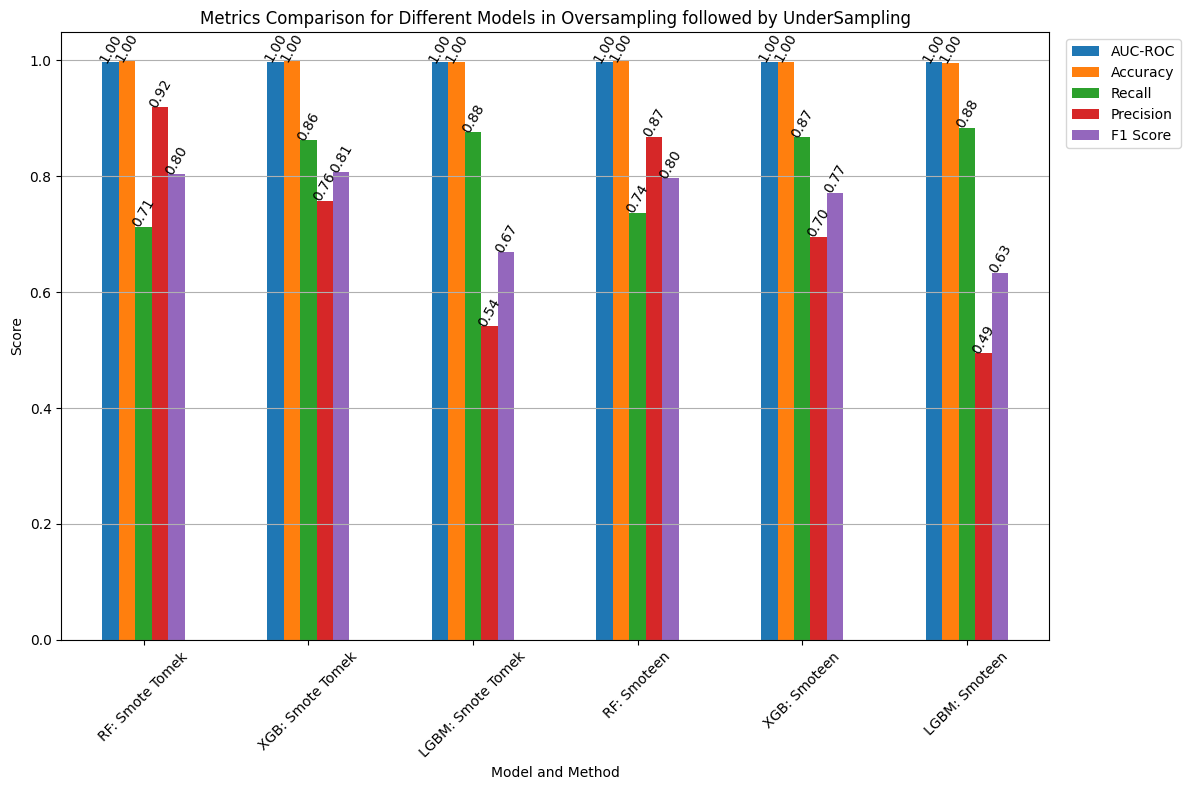

In [ ]:
# Plot metrics comparison
over_under_methods = [
    'RF: Smote Tomek', 'XGB: Smote Tomek', 'LGBM: Smote Tomek',
    'RF: Smoteen', 'XGB: Smoteen', 'LGBM: Smoteen'
]

filtered_metrics_df_over_under = metrics_df_ml.loc[over_under_methods]

# Plot metrics comparison for oversampling methods
plt.figure(figsize=(12, 8))
ax = filtered_metrics_df_over_under.iloc[:, :].plot(kind='bar', ax=plt.gca())
plt.title('Metrics Comparison for Different Models in Oversampling followed by UnderSampling')
plt.xlabel('Model and Method')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.01, 1), loc="upper left")

# Annotate bars with metric values
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', rotation=60, xytext=(0, 10), textcoords='offset points')

plt.grid(axis='y')
plt.tight_layout()
plt.show()

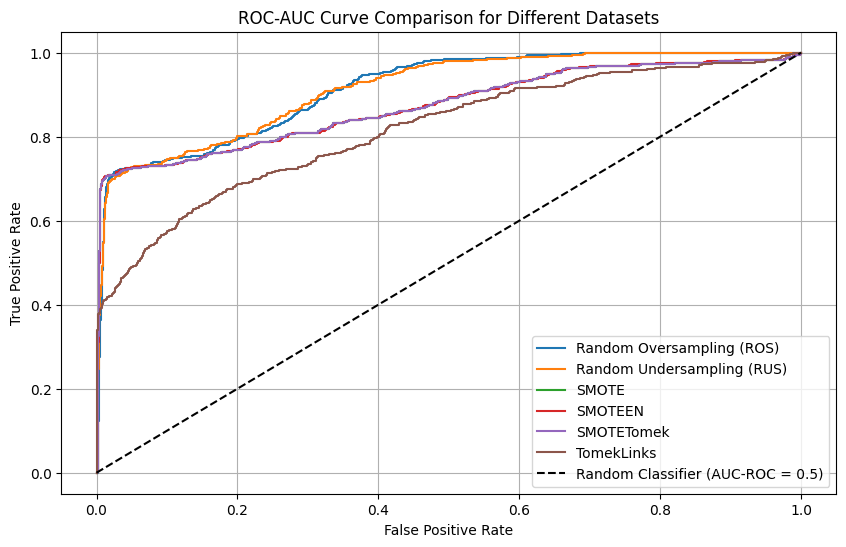

In [ ]:
# Plot ROC-AUC Curves
plt.figure(figsize=(10, 6))

# Plot ROC curves for each dataset
plt.plot(fpr_ros, tpr_ros, label='Random Oversampling (ROS)')
plt.plot(fpr_rus, tpr_rus, label='Random Undersampling (RUS)')
plt.plot(fpr_smote, tpr_smote, label='SMOTE')
plt.plot(fpr_smoteen, tpr_smoteen, label='SMOTEEN')
plt.plot(fpr_smtk, tpr_smtk, label='SMOTETomek')
plt.plot(fpr_tkl, tpr_tkl, label='TomekLinks')

# Plot random classifier line
plt.plot([0, 1], [0, 1], linestyle='--', color='black', label='Random Classifier (AUC-ROC = 0.5)')

# Set plot labels and legend
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC Curve Comparison for Different Datasets')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

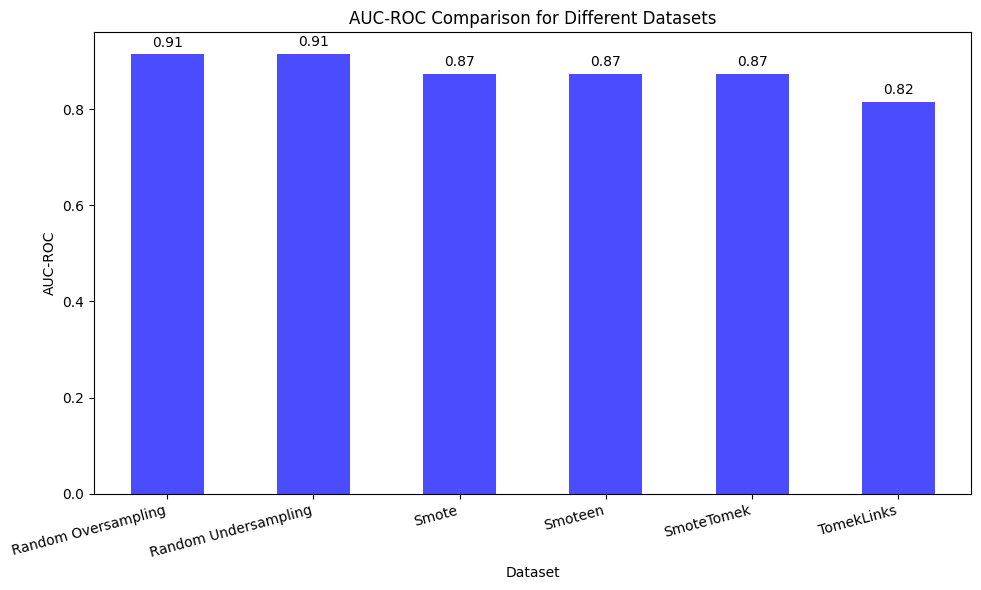

In [ ]:
# Plot AUC-ROC values
plt.figure(figsize=(10, 6))
metrics_df['AUC-ROC'].plot(kind='bar', color='blue', alpha=0.7)

# Add labels and title
plt.title('AUC-ROC Comparison for Different Datasets')
plt.xlabel('Dataset')
plt.ylabel('AUC-ROC')

# Add value labels on top of each bar
for i, auc_roc in enumerate(metrics_df['AUC-ROC']):
    plt.text(i, auc_roc + 0.01, f'{auc_roc:.2f}', ha='center', va='bottom')

# Show plot
plt.xticks(rotation=15, ha='right')
plt.tight_layout()
plt.show()
